## HANA_ML
[SAP HANA Python Client API for Machine Learning Algorithms](https://help.sap.com/http.svc/rc/3f0dbe754b194c42a6bf3405697b711f/2.0.03/en-US/html/hana_ml.html#)

In [4]:
import sys

In [5]:
#print(sys.path)

In [6]:
import os

Use the following to get the VCAP_SERVICES environment variable from xs/cf

```
xs env python-ml.db --export-json /dev/stdout 2>/dev/null | tail -n +5 | jq -r '.VCAP_SERVICES'
```

In [7]:
vcapsvcs_str = '''
{
    "xsuaa" : [ {
      "name" : "python-ml-uaa",
      "label" : "xsuaa",
      "tags" : [ "xsuaa" ],
      "plan" : "default",
      "credentials" : {
        "tenantmode" : "dedicated",
        "clientid" : "sb-na-193ff3e7-922d-4068-969d-1b0f53aa7951",
        "verificationkey" : "-----BEGIN PUBLIC KEY-----MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAsYtDBo6f+SHpxVJ+2fwnIVdSzrbuoP6lFYRfZ29soZ0XSw51IHoa3ew4t8Ep7d15ua3r7ZZCf3wteGkSO+0QdcJwak0lAEygdD9uVlANLZmu9jZMKmOcn/65XDyn++YJWQt2o5AS6Kz4XLQGSOVReQbfchcMiqJhebCtEAFTb0oYtxYjGY4dWqGnJFpv2iL/oRs304JGogaxz7cUzQiUkLDK6/elsbWAtvu+H6R1vitt/EEsHkYh3+/V5/Rf3+G16IKxIFQxIwZOR5pk1CMll1inm/Ya7Z2n5nrxs5vglyuV0oThqWxKEtNQGPG6990hOnHoMYu8JXPshL07HreIkwIDAQAB-----END PUBLIC KEY-----",
        "xsappname" : "na-193ff3e7-922d-4068-969d-1b0f53aa7951",
        "identityzone" : "uaa",
        "identityzoneid" : "uaa",
        "clientsecret" : "m63m25atIbQs27NnuOFoqeKqDhGxTxjvQW4m52hfSxDlJPuBrQQSaZQ6QPqpyE0jtzLorajiqTv0\nVTCiddMUMw==",
        "url" : "https://hxehost:39032/uaa-security"
      }
    } ],
    "hana" : [ {
      "name" : "python-ml-hdi",
      "label" : "hana",
      "tags" : [ "hana", "database", "relational" ],
      "plan" : "hdi-shared",
      "credentials" : {
        "schema" : "E4BA032547384A4C82CC3460445F2AA2",
        "hdi_password" : "Sj2Ueol9Gk7BsgH3V1atnjjuuQnrBv97drkIJJwxGb_n9.lGp_ZiWMpzIBxD7skg95GF1I5FMkYtGiNKc52HUn2pevT2tkzvjVJZOENG_6oS6eou8MDbSIE.ob8Ki9Pw",
        "password" : "Sb9x_0U165lN0_YkomXdAI.Qp1P8nauMYrE_mOOK-Xrvc5CPd.LXFH-on3xvW.esSf3SkAJh97B-gSizdght9xnGKTI28G0nEYoJt-N4j12RBqXh0LYoHQBf7aSSXZEl",
        "driver" : "com.sap.db.jdbc.Driver",
        "port" : "39013",
        "host" : "hxehost",
        "db_hosts" : [ {
          "port" : 39013,
          "host" : "hxehost"
        } ],
        "hdi_user" : "E4BA032547384A4C82CC3460445F2AA2_7E8FB15BT3WE2DB4LGIQ8315K_DT",
        "user" : "E4BA032547384A4C82CC3460445F2AA2_BHLD7OT0V73FGWXWR6IDK0ZDQ_RT",
        "url" : "jdbc:sap://hxehost:39013/?currentschema=E4BA032547384A4C82CC3460445F2AA2"
      }
    } ]
  }
'''

In [8]:
import string
vcapsvcs_str = vcapsvcs_str.translate( { ord(c):None for c in ' \n\t\r' } )

In [9]:
print(vcapsvcs_str)

{"xsuaa":[{"name":"python-ml-uaa","label":"xsuaa","tags":["xsuaa"],"plan":"default","credentials":{"tenantmode":"dedicated","clientid":"sb-na-193ff3e7-922d-4068-969d-1b0f53aa7951","verificationkey":"-----BEGINPUBLICKEY-----MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAsYtDBo6f+SHpxVJ+2fwnIVdSzrbuoP6lFYRfZ29soZ0XSw51IHoa3ew4t8Ep7d15ua3r7ZZCf3wteGkSO+0QdcJwak0lAEygdD9uVlANLZmu9jZMKmOcn/65XDyn++YJWQt2o5AS6Kz4XLQGSOVReQbfchcMiqJhebCtEAFTb0oYtxYjGY4dWqGnJFpv2iL/oRs304JGogaxz7cUzQiUkLDK6/elsbWAtvu+H6R1vitt/EEsHkYh3+/V5/Rf3+G16IKxIFQxIwZOR5pk1CMll1inm/Ya7Z2n5nrxs5vglyuV0oThqWxKEtNQGPG6990hOnHoMYu8JXPshL07HreIkwIDAQAB-----ENDPUBLICKEY-----","xsappname":"na-193ff3e7-922d-4068-969d-1b0f53aa7951","identityzone":"uaa","identityzoneid":"uaa","clientsecret":"m63m25atIbQs27NnuOFoqeKqDhGxTxjvQW4m52hfSxDlJPuBrQQSaZQ6QPqpyE0jtzLorajiqTv0VTCiddMUMw==","url":"https://hxehost:39032/uaa-security"}}],"hana":[{"name":"python-ml-hdi","label":"hana","tags":["hana","database","relational"],"plan":"hdi-shared","cre

In [10]:
os.environ['VCAP_SERVICES'] = vcapsvcs_str

In [11]:
from cfenv import AppEnv
env = AppEnv()
hana = env.get_service(label='hana')

In [12]:
schema = hana.credentials['schema']
host = hana.credentials['host']
port = hana.credentials['port']
user = hana.credentials['user']
password = hana.credentials['password']

In [13]:
output = "Key VCAP_SVCS values.\n\n"
output += 'host: ' + host + '\n'
output += 'port: ' + port + '\n'
output += 'schema: ' + schema + '\n'
output += 'user: ' + user + '\n'
output += 'pass: ' + password + '\n'
print(output)

Key VCAP_SVCS values.

host: hxehost
port: 39013
schema: E4BA032547384A4C82CC3460445F2AA2
user: E4BA032547384A4C82CC3460445F2AA2_BHLD7OT0V73FGWXWR6IDK0ZDQ_RT
pass: Sb9x_0U165lN0_YkomXdAI.Qp1P8nauMYrE_mOOK-Xrvc5CPd.LXFH-on3xvW.esSf3SkAJh97B-gSizdght9xnGKTI28G0nEYoJt-N4j12RBqXh0LYoHQBf7aSSXZEl



Doc: [End-to-End Example: Using the Python Client API for ML](https://help.sap.com/http.svc/rc/3f0dbe754b194c42a6bf3405697b711f/2.0.03/en-US/html/hana_ml.html#end-to-end-example-using-the-python-client-api-for-ml)

```
#Step 1: Import the Python Client API Library and Dataframe Library
#(dataframe, trees)
from hana_ml import dataframe
from hana_ml.algorithms import trees
```

In [14]:
from hana_ml import dataframe
import logging

```
#Step 2: Instantiate the Connection Object (conn)
conn = dataframe.ConnectionContext('<address>', <port>, '<user>','<password>')
```

In [15]:
hcc = dataframe.ConnectionContext(host, int(port), user, password)

```
#Step 3: Create the HANA Dataframe (df_fit) and Point to the
#"DATA_TBL_RFT" Table.
df_fit = conn.table("DATA_TBL_RFT")
```

In [16]:
hdf = (hcc.table('mta_python_ml.db.data::digits.number', schema=schema))

```
#Step 4: Inspect the Data
df_fit.head(4).collect()
```

In [26]:
import time
start_time = time.time()

In [27]:
hdf.head(4).collect()

,numberId,image.r1.c1,image.r1.c2,image.r1.c3,image.r1.c4,image.r1.c5,image.r1.c6,image.r1.c7,image.r1.c8,image.r2.c1,...,image.r7.c8,image.r8.c1,image.r8.c2,image.r8.c3,image.r8.c4,image.r8.c5,image.r8.c6,image.r8.c7,image.r8.c8,target
0,2,0,0,0,12,13,5,0,0,0,...,0,0,0,0,11,16,10,0,0,1
1,3,0,0,0,4,15,12,0,0,0,...,0,0,0,0,3,11,16,9,0,2
2,4,0,0,7,15,13,1,0,0,0,...,0,0,0,7,13,13,9,0,0,3
3,5,0,0,0,1,11,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [28]:
print('Training Time: {} seconds'.format(time.time() - start_time))

Training Time: 0.5955572128295898 seconds


In [20]:
hdf.head(4).drop(["numberId","target"]).collect()

,image.r1.c1,image.r1.c2,image.r1.c3,image.r1.c4,image.r1.c5,image.r1.c6,image.r1.c7,image.r1.c8,image.r2.c1,image.r2.c2,...,image.r7.c7,image.r7.c8,image.r8.c1,image.r8.c2,image.r8.c3,image.r8.c4,image.r8.c5,image.r8.c6,image.r8.c7,image.r8.c8
0,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
1,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
2,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
3,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0


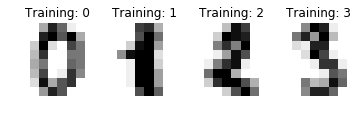

In [21]:
%matplotlib inline

# Standard scientific Python imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [101]:
idx=0;
#digits.images[idx]
type(digits.images[idx])

numpy.ndarray

Doc: [pandas: powerful Python data analysis toolkit](https://pandas.pydata.org/pandas-docs/stable/index.html)

[[16  0  5 13  9  1  0  0]
 [ 0  0 13 15 10 15  5  0]
 [ 0  3 15  2  0 11  8  0]
 [ 0  4 12  0  0  8  8  0]
 [ 0  5  8  0  0  9  8  0]
 [ 0  4 11  0  1 12  7  0]
 [ 0  2 14  5 10 12  0  0]
 [ 0  0  6 13 10  0  0  0]]


Text(0.5, 1.0, 'Training: 0')

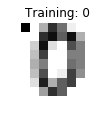

In [108]:
idx=0;
#UPDATE "mta_python_ml.db.data::digits.number" SET "image.r1.c1" = 16 WHERE "numberId" = 1
where = '"numberId" = ' + str(idx+1)
pdfimg = hdf.head(1).filter(where).drop(["numberId","target"]).collect()
pdfval = hdf.head(1).filter(where).select(["target"]).collect()
target = pdfval.iat[0,0]
#print(type(pdfval.iat[0,0]))
img = np.reshape(pdfimg.values, (-1, 8)) # Convert 1X64 to 8x8
print(img)
plt.subplot(2, 4, 1 + 1)
plt.axis('off')
plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Training: %i' % target)

Text(0.5, 1.0, 'Training: 0')

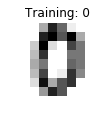

In [109]:
plt.subplot(2, 4, 1 + 1)
plt.axis('off')
plt.imshow(digits.images[idx], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Training: %i' % digits.target[idx])

In [110]:
pdfimg = hdf.drop(["numberId","target"]).collect()

In [112]:
pdfimg.describe()

,image.r1.c1,image.r1.c2,image.r1.c3,image.r1.c4,image.r1.c5,image.r1.c6,image.r1.c7,image.r1.c8,image.r2.c1,image.r2.c2,...,image.r7.c7,image.r7.c8,image.r8.c1,image.r8.c2,image.r8.c3,image.r8.c4,image.r8.c5,image.r8.c6,image.r8.c7,image.r8.c8
count,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.008904,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.377438,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.000000,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,16.000000,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


[How to Index, Slice and Reshape NumPy Arrays for Machine Learning in Python](https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/)